Here, I used sigma_1, sigma_2, sigma_3 instead of gamma_1,2,3 because the gamma matrices give rise to two sets of bands, each of which are two fold degenerate. This degeneracy of bands is detrimental for Berry curvature calculation.

Replacing gamma with sigma matrices produces the correct phase diagram Fig. S2 of SI of arxiv:2305.16313v1

In [13]:
using LinearAlgebra
using Plots
using LaTeXStrings
#plotlyjs()

In [14]:
include("angmom.jl")
sigma_x, sigma_y, sigma_z = generate_spin_matrices(1/2)
eye2 = [1 0;
        0 1]
gamma_1 = kron(sigma_x, sigma_x)
gamma_2 = kron(sigma_x, sigma_y)
gamma_3 = kron(sigma_x, sigma_z)

t0 = 1.0;
tt = 1.0;
tt_prime = 0.76;
m00 = 3.0;

### Here I am using $\sigma_i$ instead of $\Gamma_i$, because $\Gamma_i$ produces two copies with opposite Chern number

In [15]:
function H0(px::Float64,py::Float64,t::Float64,t_prime::Float64,m_0::Float64)
    return  t*kron((sin(px) + cos(px)*sin(py)),sigma_x) + t*kron(sin(py)+sin(px)*cos(py),sigma_y) + kron((m_0-2*t_prime) + t0*(cos(px) + cos(py)) + 2*t_prime*cos(px)*cos(py),sigma_z)
end

H0 (generic function with 1 method)

In [16]:
H0(1.0,1.0,1.0,1.0,1.0)

2×2 Matrix{ComplexF64}:
 0.332229-0.0im        0.64806-0.64806im
  0.64806+0.64806im  -0.332229-0.0im

In [17]:
eigvals(H0(1.0,1.0,1.0,1.0,1.0))

2-element Vector{Float64}:
 -0.9748534093956036
  0.9748534093956036

In [18]:
NBands = 2;
NGridpts = 41;

plim = pi
px_array = range(-plim,plim,NGridpts);
py_array = range(-plim,plim,NGridpts);

band = zeros(NBands,NGridpts,NGridpts)*im;
low_energy_eigenvec = zeros(NBands,NGridpts,NGridpts)*im; #This ensures that the vector can accept complex values
vec=zeros(NBands,NBands)*im;
berry_curv=zeros(NGridpts,NGridpts)*im;

In [19]:
## Here I calculate the band energy for each (px,py) and find the eigenvector of the valence band
@time for ii = 1:NGridpts
        for jj = 1:NGridpts
        #if(ishermitian(H0(px_array[ii],py_array[jj],1.0,1.0,1.0))==false)
        #    println(ii)
        #    println(jj)
        #end
            band[:,ii,jj],vec=eigen(H0(px_array[ii],py_array[jj],tt,tt_prime,m00));
            low_energy_eigenvec[:,ii,jj] = vec[:,2];
        end
      end

  0.009539 seconds (63.94 k allocations: 5.845 MiB)


In [20]:
@time for ii = 1:(NGridpts-1)#Just to get rid of boundary term
        for jj = 1:(NGridpts-1)
            a=0.0*im;
            a = (low_energy_eigenvec[:,ii,jj+1]'*low_energy_eigenvec[:,ii,jj])*(low_energy_eigenvec[:,ii,jj]'*low_energy_eigenvec[:,ii+1,jj])*(low_energy_eigenvec[:,ii+1,jj]'*low_energy_eigenvec[:,ii+1,jj+1])*(low_energy_eigenvec[:,ii+1,jj+1]'*low_energy_eigenvec[:,ii,jj+1])
            berry_curv[ii,jj] = imag(log(a/abs(a)))
        end
      end

  0.007494 seconds (48.08 k allocations: 2.102 MiB)


In [21]:
Chern_Number = sum(x -> !isnan(x) ? x : 0, real(berry_curv))/(2*pi)

1.9999999999999944

In [22]:
#Create a grid for px and py
px_grid = repeat(px_array, 1, length(py_array));
py_grid = repeat(py_array', length(px_array), 1);

  0.004509 seconds (9.06 k allocations: 707.500 KiB)
  0.004106 seconds (8.70 k allocations: 677.039 KiB)


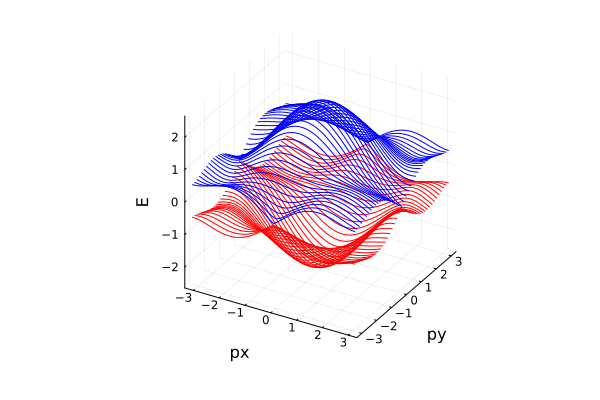

In [23]:
@time plot(px_grid,py_grid,real(band[1,:,:]),xlabel="px",ylabel="py",zlabel="E",color="red",legend=false)
@time plot!(px_grid,py_grid,real(band[2,:,:]),color="blue")
#@time plot!(px_grid,py_grid,real(band[3,:,:]),color="green")
#@time plot!(px_grid,py_grid,real(band[4,:,:]),color="orange")

  0.004370 seconds (9.07 k allocations: 681.234 KiB)


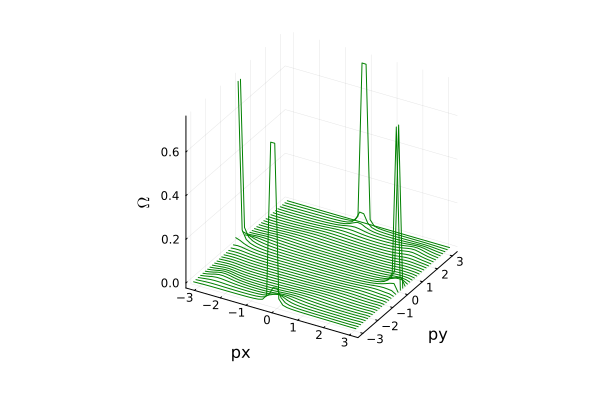

In [24]:
@time plot(px_grid,py_grid,real(berry_curv),xlabel="px",ylabel="py",zlabel=L"\Omega",color="green",legend=false)